# PREDICTION USING SUPERVISED ML

## Problem Statement

####      Predict the percentage of an student based on the no. of study hours

#### Import All Important Libraries

In [48]:
#PANDAS FOR CONVERTING AND ANALYSING DATASETS
import pandas as pd
#NUMPY FOR SCIENTIFIC COMPUTING
import numpy as np
#MATPLOTLIB FOR PLOTTING GRAPHS
import matplotlib.pyplot as plt
#SEABORN FOR DATA VISUALIZATIONS
import seaborn as sns
#SKLEARN FOR TRAINING OUR MODULE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [3]:
#PRINTING OUR DATASET CONTENT FROM CSV FILE USING read_csv
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


The first five values in the 'student_score' dataset

In [24]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Number of rows and columns

In [10]:
dataset.shape

(25, 2)

## Visualization

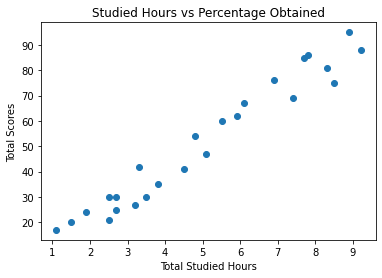

In [11]:
#Hours Vs Percentage of Scores

#PLOTTING SCATTER PLOT VISUALIZATION
plt.scatter(dataset['Hours'], dataset['Scores'])

#TITLE OF PLOT
plt.title('Studied Hours vs Percentage Obtained')

#LABELLING X-AXIS AND Y-AXIS
plt.xlabel('Total Studied Hours')
plt.ylabel('Total Scores')

#ACTUAL PLOT
plt.show()

## Train-Test Split

## APPLYING SIMPLE LINEAR REGRESSION ON TRAINING DATASET

In [21]:
#Data Preparation

#DEPENDENT VARIABLE = X
#INDEPENDENT VARIABLE = Y

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#IMPORTING train_test_split model from sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [23]:
#applying linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

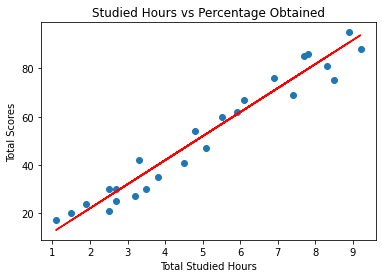

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
#TITLE OF PLOT
plt.title('Studied Hours vs Percentage Obtained')
#LABELLING X-AXIS AND Y-AXIS
plt.xlabel('Total Studied Hours')
plt.ylabel('Total Scores')
plt.show()

TEST SET RESULT PREDICTION

In [27]:
y_pred = regressor.predict(X_test)
print(y_pred)

[27.01878177 78.84466226 39.97525189 75.85470762 56.91832821 49.94176737
 33.99534261 86.81787465]


## Visualising the Training set results

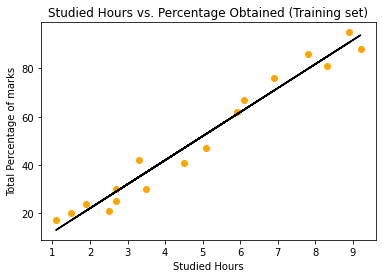

In [31]:
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Studied Hours vs. Percentage Obtained (Training set)')
plt.xlabel('Studied Hours')
plt.ylabel('Total Percentage of marks')
plt.show()

## Visualising the Test set results

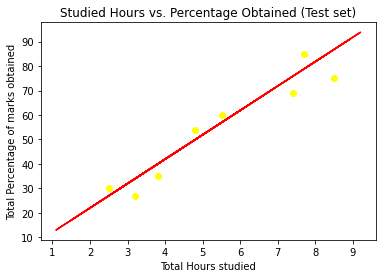

In [33]:
#scatter plot of dataset
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Studied Hours vs. Percentage Obtained (Test set)')

#labelling x-axis and y-axis
plt.xlabel('Total Hours studied')
plt.ylabel('Total Percentage of marks obtained')
plt.show()

## Comparing Actual vs Predicted

In [34]:
dataset = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

In [35]:
dataset

,Actual Values,Predicted Values
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


## FINAL CONCLUSION: PREDICTING SCORE

In [38]:
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)

In [41]:
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours per day, the score is {}.".format(pred))

If the student studies for 9.25 hours per day, the score is [94.29276126].


## ERROR METRICS

### Finding Mean Absolute Error

In [46]:
from sklearn import metrics 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 5.864954643694258


### Finding R-square Error

In [47]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.8999124290533055
